In [48]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


# networkx
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

# Python functions in .py file to read data
import data_readers

import ast

Study of the Game
- How many articles, links
- Distr of categories

Study of Man
- Shortest paths
- Categories of unfinished paths

Study of the Machine
- Compare algos

Study of Man vs Machine
- When does the man beat the machine?

In [49]:
finished_paths = data_readers.read_finished_paths()


In [50]:
# The links and edges
wikispeedia = data_readers.read_wikispeedia_graph()

# The finished paths
finished_paths = data_readers.read_finished_paths()

# The unfinished paths
unfinished_paths = data_readers.read_unfinished_paths()

# DF of all articles
articles = data_readers.read_articles()

# DF of all articles and their categories
categories = data_readers.read_categories()


# We found out later that the data contained in the shortest path matrix given to us seems to be wrong
# Here we also add a quick dictionary that properly shows that this is wrong, and give an example
shortest_path_df = data_readers.read_shortest_path_df()
shortest_path_dict = dict(nx.all_pairs_shortest_path(wikispeedia))

# Searching for the string of a given article. It has to be formatted like the article name
# Which shouldn't be a problem, as we'll probably usually retrieve them internally
obi_wan_text = data_readers.plaintext_article_finder('Obi-Wan_Kenobi')

In [51]:
machine_data = pd.read_csv('notebooks_final/machine_data_runs_0_269.csv')

In [52]:
def prepare_machine_data_shortest_paths(df) -> pd.DataFrame:
    df['Path_1'] = df['Path_1'].apply(lambda x: ast.literal_eval(x))
    df['len_shortest_path'] = machine_data['Path_1'].apply(len) 
    return df
machine_data = prepare_machine_data_shortest_paths(machine_data)


Study of the Game (Data)
- number articles, paths, etc
- Which categories are the articles in?

Study of Man
- Distribution of human paths
    - bubble chart. x-axis: category, y-axis: length to target node, size: count of paths

- Can we identify any patterns or recurring structures in the human paths (ie. going for a central hub)?

Study of the Machine
- Distribution of machine shortest paths.
- Which categories does machine have the most explorations?

Study of Man vs Machine
- When are human paths shorter than machine paths?


In [53]:
machine_data.head(1)

Unnamed: 0  Index                  Source     Target  Length_1  \
0           0      0  €2 commemorative coins  Irish Sea        44   

                                              Path_1  \
0  [€2 commemorative coins, United Kingdom, Irish...   

                                          Explored_1  Length_2 Path_2  \
0  {'€2 commemorative coins': None, 'Nutrition': ...        98     []   

                                          Explored_2  len_shortest_path  
0  {'€2 commemorative coins': None, 'Nutrition': ...                  3

# Ch 1. Study of the Game

In [54]:
# # wikispeedia
# G = nx.Graph()
# nx.drawing.nx_pydot.graphviz_layout(G)


In [55]:
# edge_trace = go.Scatter(
#     x=edge_x, y=edge_y,
#     line=dict(width=0.5, color='#888'),
#     hoverinfo='none',
#     mode='lines')




In [56]:
# node_trace = go.Scatter(
#     x=node_x, y=node_y,
#     mode='markers',
#     hoverinfo='text',
#     marker=dict(
#         showscale=True,
#         # colorscale options
#         #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
#         #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
#         #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
#         colorscale='YlGnBu',
#         reversescale=True,
#         color=[],
#         size=10,
#         colorbar=dict(
#             thickness=15,
#             title='Node Connections',
#             xanchor='left',
#             titleside='right'
#         ),
#         line_width=2))

In [57]:
# # Create Plotly figure
# fig = go.Figure()
# G = wikispeedia
# # Add nodes to the figure
# for node in G.nodes():
#     x, y = G.nodes[node]['pos'] if 'pos' in G.nodes[node] else (None, None)
#     fig.add_trace(go.Scatter(
#         x=[x],
#         y=[y],
#         mode="markers+text",
#         marker=dict(size=20),
#         text=str(node),
#         name=str(node)
#     ))
# # Add edges to the figure
# for edge in G.edges():
#     x0, y0 = G.nodes[edge[0]]['pos'] if 'pos' in G.nodes[edge[0]] else (None, None)
#     x1, y1 = G.nodes[edge[1]]['pos'] if 'pos' in G.nodes[edge[1]] else (None, None)
#     fig.add_trace(go.Scatter(
#         x=[x0, x1, None],
#         y=[y0, y1, None],
#         mode='lines',
#         line=dict(width=1),
#         name=f"Edge {edge[0]}-{edge[1]}"
#     ))

#     # Update layout
# fig.update_layout(
#     title="NetworkX Graph with Plotly",
#     showlegend=True,
#     hovermode='closest'
# )

# # Show the figure
# fig.show()

### Which categories are the target nodes from?

In [58]:
print('There are', categories['article'].duplicated().sum(), 'articles with more than 1 category.')

print('Should we drop the duplicate categories, or doublecount them?')
print('This corresponds to', categories['article'].duplicated().sum() / len(wikispeedia.nodes), 'of the articles.')

# Let's drop them for now.
categories['article'] = categories['article'].drop_duplicates()
print('The new shape is: ',categories.shape)

# Why are there more articles here than nodes (# articles)?

There are 606 articles with more than 1 category.
Should we drop the duplicate categories, or doublecount them?
This corresponds to 0.13196864111498258 of the articles.
The new shape is:  (5204, 2)


In [59]:
# Let's use string manipulation to extract the highest level category for each article.

sub_categories = categories['categories'].str[8:].str.split('.')
category_depth_1 = sub_categories.apply(lambda x: x[0])
categories['depth_1'] = category_depth_1
# categories.head()

Let's find the category corresponding to each unfinished target.

@daniele

In [60]:
# Merging categories with unfinished paths.
unfinished_paths_with_categories = pd.merge(unfinished_paths, categories, left_on = 'target', right_on= 'article', how = 'left')

# Count the occurrences of each category
category_counts_unfinished = unfinished_paths_with_categories['depth_1'].value_counts()

fig = go.Figure(go.Bar(
    x=category_counts_unfinished.index,
    y=category_counts_unfinished.values,
    marker=dict(color='blue')  # Adjust colors if needed
))

# Update layout
fig.update_layout(
    title='Frequency of Categories of Target Articles in Unfinished Paths',
    xaxis=dict(title='Categories', tickangle=45),  # Rotate x-axis labels for better readability
    yaxis=dict(title='Frequency'),
    height=500,  # Adjust the height of the plot as needed
    margin=dict(l=80, r=80, t=80, b=80),  # Adjust margins for better appearance
)

fig.show()

In [61]:
print(str(unfinished_paths_with_categories))

        hashedIpAddress   timestamp  durationInSec  \
0      2426091a53125110  1297054935           1804   
1      26141fd878806294  1297055651           1805   
2      2b015fb8181c48f2  1297090819           1818   
3      53a53bc244e08a6a  1297094761             49   
4      53a53bc244e08a6a  1297099105           1808   
...                 ...         ...            ...   
24870  109ed71f571d86e9  1389787605            180   
24871  232f992e57d43e8d  1389787697              6   
24872  2e09a7224600a7cd  1389798400           1900   
24873  60af9e2138051b96  1389799481           1903   
24874  1cf0cbb3281049ab  1389822841            352   

                                                    path            target  \
0                                         Obi-Wan_Kenobi         Microsoft   
1                                          Julius_Caesar           Caracas   
2                   Malawi;Democracy;Alexander_the_Great     First_Crusade   
3                                      

In [62]:

def barplot(df, file_name, title, color):
    fig = go.Figure(go.Bar(
        x=df.index,
        y=df.values,
        marker=dict(color=color)  # Adjust colors if needed
    ))

    # Update layout
    fig.update_layout(
        title=f"{title}",
        xaxis=dict(title='Categories', tickangle=45),  # Rotate x-axis labels for better readability
        yaxis=dict(title='Frequency'),
        height=500,  # Adjust the height of the plot as needed
        margin=dict(l=80, r=80, t=80, b=80),  # Adjust margins for better appearance
    )

    fig.show()
    fig.write_html("Figures/Plotly_"+file_name+".html")

In [63]:
barplot(category_counts_unfinished, "unfinished_paths_categories", "Frequency of Categories of Target Articles in Unfinished Paths", 'blue')

In [64]:
# Merging categories with unfinished paths.
finished_paths_with_categories = pd.merge(finished_paths, categories, left_on = 'last_article', right_on= 'article', how = 'left')

# Count the occurrences of each category
category_counts_finished = finished_paths_with_categories['depth_1'].value_counts()

In [65]:
barplot(category_counts_finished, "finished_paths_categories", "Frequency of Categories of Target Articles in Finished Paths", 'red')

In [66]:


fig = go.Figure(go.Bar(
    x=category_counts_finished.index,
    y=category_counts_finished.values,
    marker=dict(color='red')  # Adjust colors if needed
))

# Update layout
fig.update_layout(
    title='Frequency of Categories of Target Articles in Finished Paths',
    xaxis=dict(title='Categories', tickangle=45),  # Rotate x-axis labels for better readability
    yaxis=dict(title='Frequency'),
    height=500,  # Adjust the height of the plot as needed
    margin=dict(l=80, r=80, t=80, b=80),  # Adjust margins for better appearance
)

fig.show()

In [67]:
display(category_counts_finished)

depth_1
Science                    12167
Geography                  10937
History                     5116
People                      5058
Everyday_life               4714
Design_and_Technology       2822
Citizenship                 2010
Countries                   1808
Religion                    1668
Language_and_literature     1213
IT                          1142
Music                        937
Business_Studies             861
Mathematics                  530
Art                          330
Name: count, dtype: int64

In [68]:
display(category_counts_unfinished)

depth_1
Science                    6168
Everyday_life              3938
Geography                  3109
History                    2461
People                     2384
Design_and_Technology      2083
Citizenship                1061
Language_and_literature     878
Music                       564
Business_Studies            549
Religion                    541
IT                          526
Countries                   220
Mathematics                 183
Art                         156
Name: count, dtype: int64

In [69]:
import plotly.graph_objects as go

# Create the bar plot
fig = go.Figure()
fig.add_trace(go.Bar(
    x=category_counts_finished.index,
    y=category_counts_finished.values,
    name='Finished Paths',
    marker_color='green'
))
fig.add_trace(go.Bar(
    x=category_counts_unfinished.index,
    y=category_counts_unfinished.values,
    name='Unfinished Paths',
    marker_color='red'
))

# Update layout
fig.update_layout(
    title='Frequency of Target Articles by Category',
    xaxis=dict(title='Category'),
    yaxis=dict(title='Frequency'),
    barmode='stack'  # Stack the bars on top of each other
)

# Show the plot
fig.show()


Notice that targets in the science category make up the largest proportion of unfinished games. In Deliverable 3, we will investigate this more. We'll discover if this is because most of the articles are from the science category, or if science articles are actually harder to find in the game.

# Ch 2. Study of Man

In [70]:
shortest_path_df

(%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,)  \
(%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,)                                    0   
(%C3%85land,)                                                         -1   
(%C3%89douard_Manet,)                                                 -1   
(%C3%89ire,)                                                          -1   
(%C3%93engus_I_of_the_Picts,)                                         -1   
...                                                                  ...   
(Zionism,)                                                            -1   
(Zirconium,)                                                          -1   
(Zoroaster,)                                                          -1   
(Zuid-Gelders,)                                                       -1   
(Zulu,)                                                               -1   

                                     (%C3%85land,)  (%C3%89douard_Manet,)  \
(%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,)             -1                     -1   
(%C3%85land,)                                    0                     -1   
(%C3%89douard_Manet,)                           -1                      0   
(%C3%89ire,)                                    -1                     -1   
(%C3%93engus_I_of_the_Picts,)                   -1                     -1   
...                                            ...                    ...   
(Zionism,)                                      -1                     -1   
(Zirconium,)                                    -1                     -1   
(Zoroaster,)                                    -1                     -1   
(Zuid-Gelders,)                                 -1                     -1   
(Zulu,)                                         -1                     -1   

                                     (%C3%89ire,)  \
(%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,)            -1   
(%C3%85land,)                                  -1   
(%C3%89douard_Manet,)                          -1   
(%C3%89ire,)                                    0   
(%C3%93engus_I_of_the_Picts,)                  -1   
...                                           ...   
(Zionism,)                                     -1   
(Zirconium,)                                   -1   
(Zoroaster,)                                   -1   
(Zuid-Gelders,)                                -1   
(Zulu,)                                        -1   

                                     (%C3%93engus_I_of_the_Picts,)  \
(%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,)                             -1   
(%C3%85land,)                                                   -1   
(%C3%89douard_Manet,)                                           -1   
(%C3%89ire,)                                                    -1   
(%C3%93engus_I_of_the_Picts,)                                    0   
...                                                            ...   
(Zionism,)                                                      -1   
(Zirconium,)                                                    -1   
(Zoroaster,)                                                    -1   
(Zuid-Gelders,)                                                 -1   
(Zulu,)                                                         -1   

                                     (%E2%82%AC2_commemorative_coins,)  \
(%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,)                                 -1   
(%C3%85land,)                                                       -1   
(%C3%89douard_Manet,)                                               -1   
(%C3%89ire,)                                                        -1   
(%C3%93engus_I_of_the_Picts,)                                       -1   
...                                                                ...   
(Zionism,)                                                          -1   
(Zirconium,)                                                        -1   
(Zoroaster,)                                           

In [71]:
# Merging categories with finished paths.
finished_paths_with_category = pd.merge(finished_paths, categories, left_on = 'last_article', right_on= 'article', how = 'left')
finished_paths_with_category = finished_paths_with_category[['path', 'first_article', 'last_article', 'path_length', 'depth_1']]
finished_paths_with_category.rename(columns={'depth_1': 'Category'}, inplace=True)
finished_paths_with_category


path  \
0      14th_century;15th_century;16th_century;Pacific...   
1      14th_century;Europe;Africa;Atlantic_slave_trad...   
2      14th_century;Niger;Nigeria;British_Empire;Slav...   
3         14th_century;Renaissance;Ancient_Greece;Greece   
4      14th_century;Italy;Roman_Catholic_Church;HIV;R...   
...                                                  ...   
51313                   Yagan;Ancient_Egypt;Civilization   
51314  Yagan;Folklore;Brothers_Grimm;<;19th_century;C...   
51315  Yagan;Australia;England;France;United_States;T...   
51316  Yarralumla%2C_Australian_Capital_Territory;Aus...   
51317                            Ziad_Jarrah;Germany;Jew   

                                    first_article            last_article  \
0                                    14th_century     African_slave_trade   
1                                    14th_century     African_slave_trade   
2                                    14th_century     African_slave_trade   
3                                    14th_century                  Greece   
4                                    14th_century         John_F._Kennedy   
...                                           ...                     ...   
51313                                       Yagan            Civilization   
51314                                       Yagan                 Fiction   
51315                                       Yagan  U.S._Open_%28tennis%29   
51316  Yarralumla%2C_Australian_Capital_Territory         Abraham_Lincoln   
51317                                 Ziad_Jarrah                     Jew   

       path_length                 Category  
0                9                  History  
1                5                  History  
2                8                  History  
3                4                Countries  
4                7                   People  
...            ...                      ...  
51313            3              Citizenship  
51314            9  Language_and_literature  
51315            7            Everyday_life  
51316            4                   People  
51317            3                Geography  

[51318 rows x 5 columns]

In [72]:
# @daniele
# @daniele
px.histogram(finished_paths, x='path_length', title='Distribution of Finished Path Lengths taken by Humans', range_x=[0, finished_paths['path_length'].max()])

# px.bar(data_frame=)

In [73]:
fig = px.ecdf(finished_paths, x="path_length", ecdfmode="normal")
fig.show()

In [74]:
fig = px.ecdf(finished_paths, x="path_length", ecdfmode="complementary")
fig.show()

## 2.2 Study of Unique Paths / ## 2.2 Path Length Per Category
Here we study the unique source and target pairs. We will use the dataframes to compare the performance between humans and machines, as well as to know what paths to make machines complete.

**article_combinations**

This dataframe contains information on all the combination of source and target articles in the finished games (paths). It includes how many times it has been played, and the mean and std of the path length, duration of the game, and rating.

**unique_targets** and **unique_sources**


These dataframes include all the sources and targets that appears in the finished games

<br><br>
Note that we don't change to ASCII the name of the articles yet. We will do it at a later step if we need to.
<br><br>

In [99]:
# How many each pair of articles has been visited
article_combinations_count = finished_paths.groupby(['first_article', 'last_article']).size().reset_index(name='count')

# The mean and std of the path length for each pair of articles
article_combinations_stats = finished_paths.groupby(['first_article', 'last_article'])['path_length'].agg(['mean', 'std']).reset_index()
article_combinations_stats['std'] = article_combinations_stats['std'].fillna(0)
article_combinations_stats.rename(columns={'mean': 'mean_length', 'std': 'std_length'}, inplace=True)

# The mean and std of the rating for each pair of articles. 
    # Note that mean and std may be nan if there are nan ratings. We purposely leave them as nan, as we don't want to fill them with 0s or 1s.
    # Depending on the application, we could change this in the future if neeeded.
rating_combinations_stats_rating = finished_paths.groupby(['first_article', 'last_article'])['rating'].agg(['mean', 'std']).reset_index()
#rating_combinations_stats_rating['std'] = rating_combinations_stats_rating['std'].fillna(0)
mask = rating_combinations_stats_rating['mean'].notnull()
rating_combinations_stats_rating.loc[mask, 'std'] = rating_combinations_stats_rating.loc[mask, 'std'].fillna(0)
rating_combinations_stats_rating.rename(columns={'mean': 'mean_rating', 'std': 'std_rating'}, inplace=True)

# The mean and std of the time for each pair of articles.
rating_combinations_stats_time = finished_paths.groupby(['first_article', 'last_article'])['durationInSec'].agg(['mean', 'std']).reset_index()
rating_combinations_stats_time['std'] = rating_combinations_stats_time['std'].fillna(0)
rating_combinations_stats_time.rename(columns={'mean': 'mean_durationInSec', 'std': 'std_durationInSec'}, inplace=True)

# Merging all the dataframes
article_combinations = pd.merge(article_combinations_count, article_combinations_stats, on=['first_article', 'last_article'])
article_combinations = pd.merge(article_combinations, rating_combinations_stats_rating, on=['first_article', 'last_article'])
article_combinations = pd.merge(article_combinations, rating_combinations_stats_time, on=['first_article', 'last_article'])
article_combinations = pd.merge(article_combinations, categories, left_on= 'last_article', right_on = 'article')

# The number of unique sources and targets
unique_sources = finished_paths['first_article'].value_counts().reset_index()
unique_targets = finished_paths['last_article'].value_counts().reset_index()

@daniele

In [100]:
avg_length_per_category = article_combinations.groupby('depth_1')['mean_length'].mean()
x = avg_length_per_category.keys()
y = avg_length_per_category
size = np.log(article_combinations.groupby('depth_1')['count'].sum())

fig = go.Figure()

fig.add_trace(go.Scatter(
    x= x,
    y= y,
    mode='markers',
    marker=dict(
        size=size,
                # color=bubble_sizes,
                colorscale='Viridis',  # Adjust colorscale if needed
                showscale=True
                )
))

fig.update_layout(
    title='Average Path Length by Category of Target Node (from Finished Human Paths)',
    xaxis=dict(title='Categories'),
    yaxis=dict(title='Average Path Length'),
    showlegend=False,
    hovermode='closest'
)

fig.show()

In [101]:
article_combinations

first_article    last_article  count  mean_length  \
0      %E2%82%AC2_commemorative_coins       Irish_Sea      1     3.000000   
1           1928_Okeechobee_Hurricane       Irish_Sea      1     3.000000   
2        2004_Indian_Ocean_earthquake       Irish_Sea      1     5.000000   
3                             Antwerp       Irish_Sea      1     4.000000   
4                     Ayaan_Hirsi_Ali       Irish_Sea      1     4.000000   
...                               ...             ...    ...          ...   
28710                      Trojan_War     Saint_Lucia      3    26.666667   
28711                     Tycho_Brahe     Saint_Lucia      1    12.000000   
28712                     Triceratops  Ordinal_number      6     7.833333   
28713                      Union_Flag  Ordinal_number      1    17.000000   
28714    War_of_the_League_of_Cambrai          Puffin      1     6.000000   

       std_length  mean_rating  std_rating  mean_durationInSec  \
0        0.000000     1.000000     0.00000           15.000000   
1        0.000000     1.000000     0.00000           55.000000   
2        0.000000          NaN         NaN           79.000000   
3        0.000000     1.000000     0.00000           35.000000   
4        0.000000     1.000000     0.00000          134.000000   
...           ...          ...         ...                 ...   
28710   24.193663     4.666667     0.57735          502.333333   
28711    0.000000          NaN         NaN          747.000000   
28712    2.483277     4.000000     0.00000          203.166667   
28713    0.000000          NaN         NaN          610.000000   
28714    0.000000     4.000000     0.00000          299.000000   

       std_durationInSec         article  \
0               0.000000       Irish_Sea   
1               0.000000       Irish_Sea   
2               0.000000       Irish_Sea   
3               0.000000       Irish_Sea   
4               0.000000       Irish_Sea   
...                  ...             ...   
28710         248.727428     Saint_Lucia   
28711           0.000000     Saint_Lucia   
28712         176.923053  Ordinal_number   
28713           0.000000  Ordinal_number   
28714           0.000000          Puffin   

                                              categories      depth_1  
0           subject.Geography.Geography_of_Great_Britain    Geography  
1           subject.Geography.Geography_of_Great_Britain    Geography  
2           subject.Geography.Geography_of_Great_Britain    Geography  
3           subject.Geography.Geography_of_Great_Britain    Geography  
4           subject.Geography.Geography_of_Great_Britain    Geography  
...                                                  ...          ...  
28710  subject.Geography.Central_and_South_American_G...    Geography  
28711  subject.Geography.Central_and_South_American_G...    Geography  
28712                                subject.Mathematics  Mathematics  
28713                                subject.Mathematics  Mathematics  
28714                      subject.Science.Biology.Birds      Science  

[28715 rows x 12 columns]

In [77]:
fig = go.Figure()

fig.add_trace(go.Box(
    x=article_combinations['depth_1'],
    y=article_combinations['mean_length'],
    marker_color='blue',
    boxmean=True
))

fig.update_layout(
    title='Average Path Length by Category of Target Node (from Finished Human Paths)',
    xaxis=dict(title='Categories'),
    yaxis=dict(title='Average Path Length'),
    showlegend=False,
    hovermode='closest'
)

fig.show()


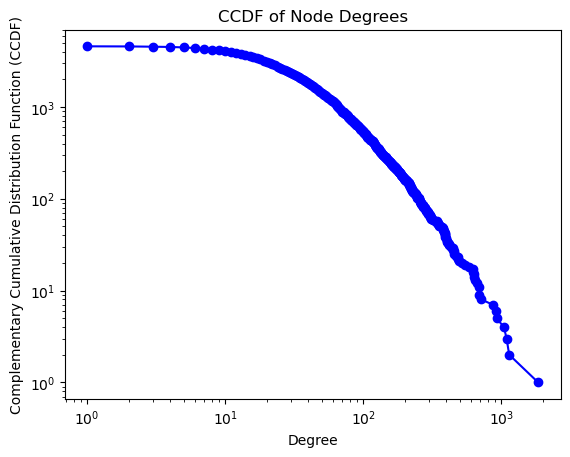

In [78]:
# Get the degrees of all nodes
degrees = dict(wikispeedia.degree())

# Calculate the CCDF
degree_values = sorted(set(degrees.values()), reverse=True)
ccdf = [sum(1 for degree in degrees.values() if degree >= d) for d in degree_values]

# Plot the CCDF
plt.plot(degree_values, ccdf, marker='o', linestyle='-', color='b')
plt.xscale('log')  # Use log scale for better visualization
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Complementary Cumulative Distribution Function (CCDF)')
plt.title('CCDF of Node Degrees')
plt.show()

In [79]:
art_more1000 = [node for node in wikispeedia.nodes if wikispeedia.degree(node) >= 1000]
art_500_1000 = [node for node in wikispeedia.nodes if (wikispeedia.degree(node) >= 500)&(wikispeedia.degree(node) < 1000)]
art_300_500 = [node for node in wikispeedia.nodes if (wikispeedia.degree(node) >= 300)&(wikispeedia.degree(node) < 500)]

print("Nodes with > 1000 edges: ", len(art_more1000), "nodes ||||", art_more1000)
print("Nodes with 500-1000 edges: ", len(art_500_1000), "nodes ||||", art_500_1000)
print("Nodes with 300-500 edges:  ", len(art_300_500), "nodes ||||", art_300_500)

Nodes with > 1000 edges:  4 nodes |||| ['United_Kingdom', 'France', 'United_States', 'Europe']
Nodes with 500-1000 edges:  16 nodes |||| ['Russia', 'World_War_II', 'Germany', 'Italy', 'Canada', 'English_language', 'England', 'Spain', 'India', 'China', 'Australia', 'Japan', 'London', 'Africa', 'Animal', 'Scientific_classification']
Nodes with 300-500 edges:   47 nodes |||| ['Ireland', 'Scotland', '20th_century', 'Currency', 'European_Union', 'List_of_countries_by_system_of_government', 'Sweden', 'Time_zone', 'Netherlands', 'Paris', 'Atlantic_Ocean', 'Greece', 'Portugal', 'Soviet_Union', 'United_Nations', 'Mexico', 'Poland', '19th_century', 'North_America', 'Iran', 'Asia', 'Islam', 'Christianity', 'Jew', 'Earth', 'Water', 'Brazil', 'Egypt', 'Roman_Catholic_Church', 'New_York_City', 'New_Zealand', 'South_Africa', 'South_America', 'Israel', 'People%27s_Republic_of_China', 'Human', 'World_War_I', 'Argentina', 'Lebanon', 'Turkey', 'German_language', 'Latin', 'French_language', 'List_of_count

In [80]:
# Merging categories with finished paths.
finished_paths_with_category = pd.merge(finished_paths, categories, left_on = 'first_article', right_on= 'article', how = 'left')
finished_paths_with_category = finished_paths_with_category[['path', 'first_article', 'last_article', 'path_length', 'depth_1']]
finished_paths_with_category.rename(columns={'depth_1': 'Category'}, inplace=True)
finished_paths_with_category


path  \
0      14th_century;15th_century;16th_century;Pacific...   
1      14th_century;Europe;Africa;Atlantic_slave_trad...   
2      14th_century;Niger;Nigeria;British_Empire;Slav...   
3         14th_century;Renaissance;Ancient_Greece;Greece   
4      14th_century;Italy;Roman_Catholic_Church;HIV;R...   
...                                                  ...   
51313                   Yagan;Ancient_Egypt;Civilization   
51314  Yagan;Folklore;Brothers_Grimm;<;19th_century;C...   
51315  Yagan;Australia;England;France;United_States;T...   
51316  Yarralumla%2C_Australian_Capital_Territory;Aus...   
51317                            Ziad_Jarrah;Germany;Jew   

                                    first_article            last_article  \
0                                    14th_century     African_slave_trade   
1                                    14th_century     African_slave_trade   
2                                    14th_century     African_slave_trade   
3                                    14th_century                  Greece   
4                                    14th_century         John_F._Kennedy   
...                                           ...                     ...   
51313                                       Yagan            Civilization   
51314                                       Yagan                 Fiction   
51315                                       Yagan  U.S._Open_%28tennis%29   
51316  Yarralumla%2C_Australian_Capital_Territory         Abraham_Lincoln   
51317                                 Ziad_Jarrah                     Jew   

       path_length   Category  
0                9    History  
1                5    History  
2                8    History  
3                4    History  
4                7    History  
...            ...        ...  
51313            3     People  
51314            9     People  
51315            7     People  
51316            4  Geography  
51317            3     People  

[51318 rows x 5 columns]

In [81]:
display(finished_paths_with_category)
# This is just splitting all the values in paths, and doing a value count for each one of those!
paths_per_step = finished_paths_with_category['path'].apply(lambda x: x.split(';')[1:-1])
node_appearance_counts = paths_per_step.explode().value_counts()
node_appearance_counts = node_appearance_counts.rename_axis('Node_Name').reset_index()

# For this, we add the information of the degree of each node, because it's interesting!
degree_dict = dict(wikispeedia.degree())
node_appearance_counts['Degree'] = node_appearance_counts['Node_Name'].map(degree_dict)
display(node_appearance_counts)
#node_appearance_counts.plot.scatter('count', 'Degree')
merged_df = pd.merge(node_appearance_counts, finished_paths_with_category[['last_article', 'Category']], left_on='Node_Name', right_on='last_article', how='left').drop_duplicates()
merged_df.drop(columns=['last_article'], inplace=True)
display(merged_df)

fig = px.scatter(merged_df, x='count', y='Degree', color='Category', hover_data='Node_Name', opacity=0.5, title='Appearances in paths versus degree')

fig.update_layout(
    title='Appearances in paths versus degree',
    xaxis=dict(title='Count'),
    yaxis=dict(title='Degree')
)

fig.show()



path  \
0      14th_century;15th_century;16th_century;Pacific...   
1      14th_century;Europe;Africa;Atlantic_slave_trad...   
2      14th_century;Niger;Nigeria;British_Empire;Slav...   
3         14th_century;Renaissance;Ancient_Greece;Greece   
4      14th_century;Italy;Roman_Catholic_Church;HIV;R...   
...                                                  ...   
51313                   Yagan;Ancient_Egypt;Civilization   
51314  Yagan;Folklore;Brothers_Grimm;<;19th_century;C...   
51315  Yagan;Australia;England;France;United_States;T...   
51316  Yarralumla%2C_Australian_Capital_Territory;Aus...   
51317                            Ziad_Jarrah;Germany;Jew   

                                    first_article            last_article  \
0                                    14th_century     African_slave_trade   
1                                    14th_century     African_slave_trade   
2                                    14th_century     African_slave_trade   
3                                    14th_century                  Greece   
4                                    14th_century         John_F._Kennedy   
...                                           ...                     ...   
51313                                       Yagan            Civilization   
51314                                       Yagan                 Fiction   
51315                                       Yagan  U.S._Open_%28tennis%29   
51316  Yarralumla%2C_Australian_Capital_Territory         Abraham_Lincoln   
51317                                 Ziad_Jarrah                     Jew   

       path_length   Category  
0                9    History  
1                5    History  
2                8    History  
3                4    History  
4                7    History  
...            ...        ...  
51313            3     People  
51314            9     People  
51315            7     People  
51316            4  Geography  
51317            3     People  

[51318 rows x 5 columns]

Node_Name  count  Degree
0                      <  20561     NaN
1          United_States   8824  1845.0
2                 Europe   4319  1092.0
3         United_Kingdom   3860  1140.0
4                  Earth   3153   387.0
...                  ...    ...     ...
3402            Wikinews      1    16.0
3403         Zebra_shark      1    10.0
3404     Gray_reef_shark      1    10.0
3405          Blue_shark      1    18.0
3406  Arcadia_%28play%29      1    12.0

[3407 rows x 3 columns]

Node_Name  count  Degree       Category
0                       <  20561     NaN            NaN
1           United_States   8824  1845.0  Everyday_life
2           United_States   8824  1845.0      Geography
3           United_States   8824  1845.0        Science
4           United_States   8824  1845.0       Religion
...                   ...    ...     ...            ...
49622          Blue_shark      1    18.0        Science
49623          Blue_shark      1    18.0  Everyday_life
49633          Blue_shark      1    18.0        History
49645          Blue_shark      1    18.0         People
49648  Arcadia_%28play%29      1    12.0            NaN

[16153 rows x 4 columns]

Node_Name  count  Degree
0                      <  20561     NaN
1          United_States   8824  1845.0
2                 Europe   4319  1092.0
3         United_Kingdom   3860  1140.0
4                  Earth   3153   387.0
...                  ...    ...     ...
3402            Wikinews      1    16.0
3403         Zebra_shark      1    10.0
3404     Gray_reef_shark      1    10.0
3405          Blue_shark      1    18.0
3406  Arcadia_%28play%29      1    12.0

[3407 rows x 3 columns]

Text(0.5, 1.0, 'Appearances in paths versus degree')

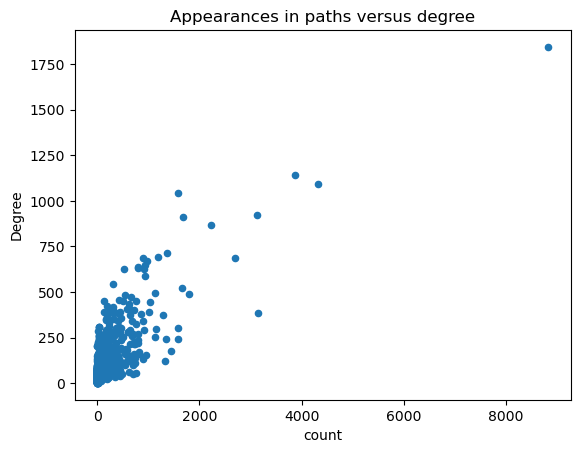

In [82]:
paths_finished = pd.read_csv('datasets/wikispeedia_paths-and-graph/paths_finished.tsv', sep='\t', skiprows=15,
                             names=['hashedIpAddress', 'timestamp', "durationInSec", 'path', "rating"])

# This is just splitting all the values in paths, and doing a value count for each one of those!
paths_per_step = paths_finished['path'].apply(lambda x: x.split(';')[1:-1])
node_appearance_counts = paths_per_step.explode().value_counts()
node_appearance_counts = node_appearance_counts.rename_axis('Node_Name').reset_index()

# For this, we add the information of the degree of each node, because it's interesting!
degree_dict = dict(wikispeedia.degree())
node_appearance_counts['Degree'] = node_appearance_counts['Node_Name'].map(degree_dict)
display(node_appearance_counts)
node_appearance_counts.plot.scatter('count', 'Degree')
plt.title('Appearances in paths versus degree')

Text(0.5, 1.0, 'Appearances in paths versus degree shortest paths')

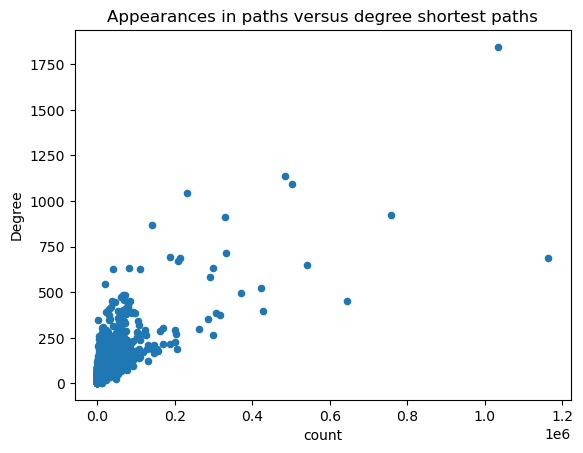

In [83]:
shortest_path_dict = dict(nx.all_pairs_shortest_path(wikispeedia))

# So, we also remove the first and last element in here
shortest_path_df = pd.DataFrame(shortest_path_dict)
shortest_path_df = pd.melt(shortest_path_df)
# This column is not useful
shortest_path_df = shortest_path_df.drop(['variable'], axis=1)
shortest_path_df = shortest_path_df['value'].dropna()
# This is to remove source and target, to keep the comparison similar
shortest_path_df = shortest_path_df.apply(lambda x: x[1:-1])
# This is to only keep lists that actually have at least one element
shortest_path_df = shortest_path_df[shortest_path_df.map(lambda x: len(x)>0)]

shortest_app_counts = shortest_path_df.explode().value_counts()
shortest_app_counts = shortest_app_counts.rename_axis('Node_Name').reset_index()
shortest_app_counts['Degree'] = shortest_app_counts['Node_Name'].map(degree_dict)

shortest_app_counts.plot.scatter('count', 'Degree')
plt.title('Appearances in paths versus degree shortest paths')

In [84]:
# Get the percentages
total_nodes = len(wikispeedia.nodes)
print('Total number of nodes:', total_nodes, '\n')

# Count the number of nodes with degree 1
nodes_degree_1 = [node for node in wikispeedia.nodes if wikispeedia.degree(node) == 1]
print('Nodes with degree 1: ',len(nodes_degree_1), "nodes ||||", nodes_degree_1)
# print percentage over total
print('Percentage of nodes with degree 1: ', len(nodes_degree_1) / total_nodes, '\n')

percentage_degree_1 = (len(nodes_degree_1) / total_nodes)
#print('% of nodes that have only 1 edge/link:', percentage_degree_1)

# Count number of nodes with degree <= 20
nodes_degree_20 = [node for node in wikispeedia.nodes if wikispeedia.degree(node) <= 20]
print('Nodes with degree <=20: ',len(nodes_degree_20))
print('Percentage of nodes with degree <=20: ', len(nodes_degree_20) / total_nodes)

Total number of nodes: 4592 

Nodes with degree 1:  13 nodes |||| ['All_your_base_are_belong_to_us', 'Local_community', 'Dewey_Square', 'Emma_Roberts', 'Human_abdomen', 'Pere_Marquette_1225', 'Pro_Milone', 'Sunol_Water_Temple', 'T._D._Judah', 'Terik', 'Duchenne_muscular_dystrophy', 'Klinefelter%27s_syndrome', 'White_Mountain_art']
Percentage of nodes with degree 1:  0.0028310104529616726 

Nodes with degree <=20:  1581
Percentage of nodes with degree <=20:  0.344294425087108


In [85]:
print('There are', categories['article'].duplicated().sum(), 'articles with more than 1 category.')

print('Should we drop the duplicate categories, or doublecount them?')
print('This corresponds to', categories['article'].duplicated().sum() / len(wikispeedia.nodes), 'of the articles.')

# Let's drop them for now.
categories['article'] = categories['article'].drop_duplicates()
print('The new shape is: ',categories.shape)

# Why are there more articles here than nodes (# articles)?

There are 605 articles with more than 1 category.
Should we drop the duplicate categories, or doublecount them?
This corresponds to 0.13175087108013936 of the articles.
The new shape is:  (5204, 3)


In [86]:
print(degrees)
higher_degree = 300 # nodes that have at least 300 degree

{'%C3%81ed%C3%A1n_mac_Gabr%C3%A1in': 11, 'Bede': 39, 'Columba': 23, 'D%C3%A1l_Riata': 32, 'Great_Britain': 215, 'Ireland': 390, 'Isle_of_Man': 97, 'Monarchy': 200, 'Orkney': 61, 'Picts': 44, 'Scotland': 450, 'Wales': 225, '%C3%85land': 19, '20th_century': 399, 'Baltic_Sea': 111, 'Crimean_War': 56, 'Currency': 313, 'Euro': 147, 'European_Union': 381, 'Finland': 228, 'League_of_Nations': 137, 'List_of_countries_by_system_of_government': 453, 'Nationality': 43, 'Parliamentary_system': 135, 'Police': 97, 'Russia': 625, 'Stockholm': 63, 'Sweden': 389, 'Time_zone': 390, 'Tourism': 210, 'United_Kingdom': 1140, 'World_War_II': 870, '%C3%89douard_Manet': 20, 'Absinthe': 42, 'Beer': 103, 'Claude_Monet': 24, 'Diego_Vel%C3%A1zquez': 46, 'Edgar_Allan_Poe': 69, 'France': 1044, 'Francisco_Goya': 19, 'Germany': 912, 'Impressionism': 43, 'Italy': 635, 'Landscape': 18, 'Netherlands': 458, 'Painting': 113, 'Paris': 420, 'Photography': 49, 'Raphael': 52, 'Renaissance': 185, 'United_States_dollar': 224, 'W

In [87]:
len(wikispeedia.nodes)

4592

In [88]:
for node in [nodo for nodo in wikispeedia.nodes()]:
    wikispeedia.nodes[node]['degree'] = degrees[node]
print(wikispeedia.nodes(data=True))

[('%C3%81ed%C3%A1n_mac_Gabr%C3%A1in', {'degree': 11}), ('Bede', {'degree': 39}), ('Columba', {'degree': 23}), ('D%C3%A1l_Riata', {'degree': 32}), ('Great_Britain', {'degree': 215}), ('Ireland', {'degree': 390}), ('Isle_of_Man', {'degree': 97}), ('Monarchy', {'degree': 200}), ('Orkney', {'degree': 61}), ('Picts', {'degree': 44}), ('Scotland', {'degree': 450}), ('Wales', {'degree': 225}), ('%C3%85land', {'degree': 19}), ('20th_century', {'degree': 399}), ('Baltic_Sea', {'degree': 111}), ('Crimean_War', {'degree': 56}), ('Currency', {'degree': 313}), ('Euro', {'degree': 147}), ('European_Union', {'degree': 381}), ('Finland', {'degree': 228}), ('League_of_Nations', {'degree': 137}), ('List_of_countries_by_system_of_government', {'degree': 453}), ('Nationality', {'degree': 43}), ('Parliamentary_system', {'degree': 135}), ('Police', {'degree': 97}), ('Russia', {'degree': 625}), ('Stockholm', {'degree': 63}), ('Sweden', {'degree': 389}), ('Time_zone', {'degree': 390}), ('Tourism', {'degree': 

In [89]:
nodes_higher_degree = [n for n, data in wikispeedia.nodes(data=True) if 'degree' in data and data['degree'] >= higher_degree]
print(len(nodes_higher_degree))
# there is only 67 nodes with higher degree than 300, let's draw the first 60 to be in accordance with the other drawing and allow comparison

67


In [90]:
# let's sort the nodes so that we can visualize the N elements greater than average
N = 60 
nodes_ordered_per_pagerank = sorted(nodes_higher_degree, key=lambda n: wikispeedia.nodes[n]['degree'], reverse=True)[:N]
# select this nodes from the original Wikispeedia graph 
wdegree = wikispeedia.subgraph(nodes_ordered_per_pagerank).copy()
print(wdegree)

DiGraph with 60 nodes and 1215 edges


In [91]:
print(wdegree.edges)

[('Brazil', 'Africa'), ('Brazil', 'Argentina'), ('Brazil', 'Asia'), ('Brazil', 'Atlantic_Ocean'), ('Brazil', 'Brazil'), ('Brazil', 'Currency'), ('Brazil', 'English_language'), ('Brazil', 'Europe'), ('Brazil', 'Germany'), ('Brazil', 'Islam'), ('Brazil', 'Italy'), ('Brazil', 'List_of_countries_by_system_of_government'), ('Brazil', 'Portugal'), ('Brazil', 'South_America'), ('Brazil', 'Time_zone'), ('Brazil', 'United_Kingdom'), ('New_Zealand', 'Asia'), ('New_Zealand', 'Australia'), ('New_Zealand', 'Canada'), ('New_Zealand', 'Christianity'), ('New_Zealand', 'Currency'), ('New_Zealand', 'England'), ('New_Zealand', 'Europe'), ('New_Zealand', 'France'), ('New_Zealand', 'Germany'), ('New_Zealand', 'Iran'), ('New_Zealand', 'Japan'), ('New_Zealand', 'Latin'), ('New_Zealand', 'List_of_countries_by_system_of_government'), ('New_Zealand', 'London'), ('New_Zealand', 'Netherlands'), ('New_Zealand', 'People%27s_Republic_of_China'), ('New_Zealand', 'Scotland'), ('New_Zealand', 'Time_zone'), ('New_Zealan

In [92]:
def hierarchical_layout(net):
	return graphviz_layout(net, prog="dot")

node_labels = {node: node for node in wdegree.nodes()}

pos = hierarchical_layout(wdegree)
plt.figure(figsize=(50,50))
nx.draw(wdegree,pos, node_size=[(wdegree.nodes[n]['degree'] *80) for n in wdegree], node_color='orange', font_weight='bold', with_labels=True, labels=node_labels, font_color='purple', font_size=35, linewidths=10)
plt.title('Higher Degree Nodes', fontsize=100)
plt.show()

/var/folders/zj/yvxlbp5x6xv40vsg0qbwpzxr0000gn/T/ipykernel_27045/106886975.py:2: DeprecationWarning:

nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723



ModuleNotFoundError: No module named 'pydot'

In [ ]:
G = wdegree
print(G)


DiGraph with 60 nodes and 1215 edges


In [ ]:
#G = nx.random_geometric_graph(200, 0.125)
print(G)
pos = nx.spring_layout(G)


node_x = []
node_y = []
node_text = []
node_size = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(str(node))  # Node identifier as hover text
    node_size.append(G.degree(node) * 0.5)  # Scaling factor is 5



node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    hoverinfo='text',
    hovertext=node_text,
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=node_size,  # Set size of nodes
        
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))


edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)),
                )
fig.show()



DiGraph with 60 nodes and 1215 edges


In [ ]:
#G = nx.random_geometric_graph(200, 0.125)
print(G)

def plot_network(G, file_name, title, color):
    
    pos = nx.spring_layout(G)
    node_x = []
    node_y = []
    node_text = []
    node_size = []

    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_text.append(str(node))  # Node identifier as hover text
        node_size.append(G.degree(node) * 0.5)  # Scaling factor is 5



    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        hoverinfo='text',
        hovertext=node_text,
        marker=dict(
            showscale=False,
            # colorscale options
            #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
            #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
            #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
            color=color,
            size=node_size,  # Set size of nodes
            
            colorbar=dict(
                thickness=15,
                title='Node Connections',
                xanchor='left',
                titleside='right'
            ),
            line_width=2))


    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')

    fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title=title,
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)),
                    )
    fig.show()
    fig.write_html("Figures/Plotly_"+file_name+".html")


DiGraph with 60 nodes and 1162 edges


In [ ]:
plot_network(wdegree, "network_higher_degree", "Higher Degree Nodes", 'orange')

In [ ]:
import networkx as nx
import plotly.graph_objects as go

# Assuming 'finished_paths_with_category' contains the paths and 'wikispeedia' is your graph

# Filter paths that end with 'Telephone'
telephone_paths = finished_paths_with_category[finished_paths_with_category['last_article'] == 'Telephone']

# Sort the paths by their length to get the shortest ones
sorted_paths = telephone_paths.sort_values(by='path_length').head(5)

# Initialize lists to hold the nodes and edges for the shortest paths
shortest_path_nodes = set()
shortest_path_edges = []

# Iterate through the sorted paths to populate the nodes and edges
for path_str in sorted_paths['path']:
    path_nodes = path_str.split(';')
    shortest_path_nodes.update(path_nodes)
    path_edges = list(zip(path_nodes[:-1], path_nodes[1:]))
    shortest_path_edges.extend(path_edges)

# Create a subgraph for the shortest paths
subgraph = wikispeedia.subgraph(shortest_path_nodes)

# Use spring layout to get the positions for the subgraph nodes
pos = nx.spring_layout(subgraph)

# Now create your plotly traces, similar to the previous code
node_x = []
node_y = []
node_text = []
for node in subgraph.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=node_text,
    hoverinfo='text',
    marker=dict(size=10)
)

edge_x = []
edge_y = []
for edge in shortest_path_edges:
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='black'),
    hoverinfo='none',
    mode='lines'
)

# Create the figure and add the traces
fig = go.Figure(data=[edge_trace, node_trace], layout=go.Layout(
    title=f'5 Shortest Paths to "Telephone"',
    showlegend=False,
    hovermode='closest',
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
))

# Show the plot
fig.show()


In [ ]:
import networkx as nx
import plotly.graph_objects as go

# Assuming 'finished_paths_with_category' contains the paths and 'wikispeedia' is your graph
# Define the target
target = 'Telephone'

# Filter paths that end with 'Telephone'
telephone_paths = finished_paths_with_category[finished_paths_with_category['last_article'] == target]

# Sort the paths by their length to get the shortest ones
sorted_paths = telephone_paths.sort_values(by='path_length').head(5)

# Predefined list of colors for the paths
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create a new graph object
fig = go.Figure()

# Use spring layout to get the positions for the subgraph nodes
pos = nx.spring_layout(wikispeedia, k=0.15, iterations=20)  # Adjust k as needed


# Add nodes and edges for each path
for i, path_row in sorted_paths.iterrows():
    path = path_row['path'].split(';')
    edge_x = []
    edge_y = []
    for j in range(len(path) - 1):
        x0, y0 = pos[path[j]]
        x1, y1 = pos[path[j + 1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
        
    # Add edge trace for each path
    fig.add_trace(go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=2, color=colors[i % len(colors)]),
        hoverinfo='none',
        mode='lines',
        name=f'Path {i+1}'
    ))

# Extract all nodes from the paths to create the node trace
node_x = []
node_y = []
node_text = []
all_nodes = set(node for path in sorted_paths['path'] for node in path.split(';'))
for node in all_nodes:
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)

# Add node trace
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=node_text,
    hoverinfo='text',
    marker=dict(size=10, color='#888')  # Change color to your preference
)

# Add node trace to the figure
fig.add_trace(node_trace)

# Set layout properties
fig.update_layout(
    title=f'Top 5 Shortest Paths to "Telephone"',
    showlegend=True,
    hovermode='closest',
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
)

# Show the plot
fig.show()


In [ ]:
pip install dash

Note: you may need to restart the kernel to use updated packages.


In [ ]:
dic = nx.pagerank(wikispeedia)
print(dic)
for node in [nodo for nodo in wikispeedia.nodes()]:
    wikispeedia.nodes[node]['pagerank'] = dic[node]
print(wikispeedia.nodes(data=True))

{'%C3%81ed%C3%A1n_mac_Gabr%C3%A1in': 3.2710390395592254e-05, 'Bede': 0.00021938161316650256, 'Columba': 0.00012116881897593145, 'D%C3%A1l_Riata': 0.00010556015467803797, 'Great_Britain': 0.0015061292462843425, 'Ireland': 0.0018999654148516224, 'Isle_of_Man': 0.00046032088563309313, 'Monarchy': 0.0008133221072287704, 'Orkney': 0.00028994588516574057, 'Picts': 0.00019759121101826143, 'Scotland': 0.0021425304277849183, 'Wales': 0.0010997632074287427, '%C3%85land': 3.2710390395592254e-05, '20th_century': 0.002361539066403613, 'Baltic_Sea': 0.0006497932466591777, 'Crimean_War': 0.00022012926646383522, 'Currency': 0.003237155919656553, 'Euro': 0.001249533710187169, 'European_Union': 0.002318582455038707, 'Finland': 0.001009621435681574, 'League_of_Nations': 0.0005769703027683626, 'List_of_countries_by_system_of_government': 0.0028333266533963103, 'Nationality': 0.00022617861790487603, 'Parliamentary_system': 0.000721430277649281, 'Police': 0.00025282362854375833, 'Russia': 0.0034961316179664

In [ ]:
data = {}
# establish article name as index
articles_index = list(wikispeedia.nodes())
df = pd.DataFrame(data, index=articles_index)
# add main column
df['articles'] = articles_index
df['Degree'] = degrees.values()
df['PageRank'] = dic.values()
pd.set_option('display.precision', 15) # add precision to the df
df

articles  Degree  \
%C3%81ed%C3%A1n_mac_Gabr%C3%A1in  %C3%81ed%C3%A1n_mac_Gabr%C3%A1in      11   
Bede                                                          Bede      39   
Columba                                                    Columba      23   
D%C3%A1l_Riata                                      D%C3%A1l_Riata      32   
Great_Britain                                        Great_Britain     215   
...                                                            ...     ...   
Yellowhammer                                          Yellowhammer      13   
Yotsuya_Kaidan                                      Yotsuya_Kaidan       2   
You%27re_Still_the_One                      You%27re_Still_the_One       2   
Yungay%2C_Peru                                      Yungay%2C_Peru       4   
Zara_Yaqob                                              Zara_Yaqob       6   

                                           PageRank  
%C3%81ed%C3%A1n_mac_Gabr%C3%A1in  0.000032710390396  
Bede                              0.000219381613167  
Columba                           0.000121168818976  
D%C3%A1l_Riata                    0.000105560154678  
Great_Britain                     0.001506129246284  
...                                             ...  
Yellowhammer                      0.000032710390396  
Yotsuya_Kaidan                    0.000032710390396  
You%27re_Still_the_One            0.000032710390396  
Yungay%2C_Peru                    0.000032710390396  
Zara_Yaqob                        0.000032710390396  

[4592 rows x 3 columns]

In [ ]:
average = sum(dic.values()) / len(dic)
print(average)

0.00021777003484320113


In [ ]:
nodos_greater_than_average = [n for n, data in wikispeedia.nodes(data=True) if 'pagerank' in data and data['pagerank'] > average]
# let's sort the nodes so that we can visualize the N elements greater than average
N = 60 # to avoid extra computing time try not to establish N higher than 80
# In this case, we chose N = 60 because 
nodes_ordered_per_pagerank = sorted(nodos_greater_than_average, key=lambda n: wikispeedia.nodes[n]['pagerank'], reverse=True)[:N]
# select this nodes from the original Wikispeedia graph 
wavg = wikispeedia.subgraph(nodes_ordered_per_pagerank).copy()
print(wavg)
G = wavg
print(G)
pos = nx.spring_layout(G)


node_x = []
node_y = []
node_text = []
node_size = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(str(node))  # Node identifier as hover text
    node_size.append(G.degree(node) * 0.5)  # Scaling factor is 5



node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    hoverinfo='text',
    hovertext=node_text,
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=node_size,  # Set size of nodes
        
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))


edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)),
                )
fig.show()

DiGraph with 60 nodes and 1162 edges
DiGraph with 60 nodes and 1162 edges


In [ ]:
unique_sources.sample(5)

first_article  count
2763                  Star_anise      7
3311                   Jane_Eyre      5
958                   Erie_Canal     15
3080  George_II_of_Great_Britain      6
1671                Barbary_Lion     11

In [ ]:
unique_targets.sample(5)

last_article  count
1596   Nashville%2C_Tennessee     10
2217      Edward_V_of_England      7
2203  North_Sea_flood_of_1953      7
1761         Flemish_dialects      9
1350                    Macau     12

# Ch 3. Study of Machine

# Ch 4. Study of Man vs Machine

In [93]:
machine_data = pd.read_csv('notebooks_final/machine_data_runs_934_most_common.csv')

In [94]:
display(machine_data)
print(machine_data.columns)

Unnamed: 0  Index                         Source           Target  \
0          2318   2318                       Asteroid           Viking   
1          4427   4427                          Brain        Telephone   
2         25700  25700                        Theatre            Zebra   
3         21255  21255                        Pyramid             Bean   
4          3206   3206                         Batman             Wood   
..          ...    ...                            ...              ...   
929        9815   9815  Flag of the Republic of China         Tanzania   
930        3011   3011                      Barcelona  Tower of London   
931       18421  18421                    New Zealand          Atheism   
932        2979   2979                       Barbados           Butter   
933        7228   7228                         Curium        Vegetable   

     Length_1                                             Path_1  \
0          41         ['Asteroid', '1 Ceres', 'Paris', 'Viking']   
1         217  ['Brain', 'Psychology', '19th century', 'Telep...   
2         707        ['Theatre', 'India', 'Extinction', 'Zebra']   
3         227  ['Pyramid', 'United States', 'Turks and Caicos...   
4         138  ['Batman', 'Scotland', 'Industrial Revolution'...   
..        ...                                                ...   
929       154  ['Flag of the Republic of China', 'Japan', 'Pa...   
930       996  ['Barcelona', 'War of the Spanish Succession',...   
931        61            ['New Zealand', 'Australia', 'Atheism']   
932       438  ['Barbados', 'List of countries by system of g...   
933       108  ['Curium', 'University of Chicago', 'Syria', '...   

                                            Explored_1  Length_2  \
0    {'Asteroid': None, 'Solar System': 'Asteroid',...       126   
1    {'Brain': None, 'Tay-Sachs disease': 'Brain', ...        23   
2    {'Theatre': None, 'Aristotle': 'Theatre', 'Lig...       221   
3    {'Pyramid': None, 'Egyptian pyramids': 'Pyrami...       461   
4    {'Batman': None, 'Superman': 'Batman', 'Earthq...        71   
..                                                 ...       ...   
929  {'Flag of the Republic of China': None, 'Qing ...       377   
930  {'Barcelona': None, 'Spanish language': 'Barce...        79   
931  {'New Zealand': None, 'List of countries by sy...       115   
932  {'Barbados': None, 'List of countries by syste...       895   
933  {'Curium': None, 'University of Chicago': 'Cur...       174   

                                                Path_2  \
0                                                   []   
1                                                   []   
2                                                   []   
3    ['Pyramid', 'Egyptian pyramids', 'Cairo', 'Kha...   
4                                                   []   
..                                                 ...   
929                                                 []   
930                                                 []   
931  ['New Zealand', 'List of countries by system o...   
932                                                 []   
933  ['Curium', 'University of Chicago', 'Princeton...   

                                            Explored_2  
0    {'Asteroid': None, 'Solar System': 'Asteroid',...  
1    {'Brain': None, 'Tay-Sachs disease': 'Brain', ...  
2    {'Theatre': None, 'Aristotle': 'Theatre', 'Ber...  
3    {'Pyramid': None, 'Egyptian pyramids': 'Pyrami...  
4    {'Batman': None, 'Superman': 'Batman', 'Friedr...  
..                                                 ...  
929  {'Flag of the Republic of China': None, 'Qing ...  
930  {'Barcelona': None, 'Spanish language': 'Barce...  
931  {'New Zealand': None, 'List of countries by sy...  
932  {'Barbados': None, 'List of countries by syste...  
933  {'Curium': None, 'University of Chicago': 'Cur...  

[934 rows x 10 columns]

Index(['Unnamed: 0', 'Index', 'Source', 'Target', 'Length_1', 'Path_1',
       'Explored_1', 'Length_2', 'Path_2', 'Explored_2'],
      dtype='object')


In [95]:
def prepare_machine_data_shortest_paths(df, var_path) -> pd.DataFrame:
    print('sucuni')
    df[var_path] = df[var_path].apply(lambda x: ast.literal_eval(x))
    print('suca')
    df['len_shortest_path'] = machine_data[var_path].apply(len) 
    df.columns = [col.lower() for col in df.columns]
    # Drop useless columns
    df = df[['source', 'target', 'len_shortest_path']]
    return df


In [96]:
machine_data = prepare_machine_data_shortest_paths(machine_data, 'Path_1')

sucuni
suca


In [ ]:
machine_data

source           target  len_shortest_path
0                         Asteroid           Viking                  4
1                            Brain        Telephone                  4
2                          Theatre            Zebra                  4
3                          Pyramid             Bean                  4
4                           Batman             Wood                  4
..                             ...              ...                ...
929  Flag of the Republic of China         Tanzania                  4
930                      Barcelona  Tower of London                  4
931                    New Zealand          Atheism                  3
932                       Barbados           Butter                  4
933                         Curium        Vegetable                  4

[934 rows x 3 columns]

In [ ]:
machine_data_carol = pd.read_csv('machine_outputs/carolOutput.csv')
machine_data_carlos = pd.read_csv('machine_outputs/data_carlos.csv')
machine_data_nick = pd.read_csv('machine_outputs/landmark_method_results.csv')

In [ ]:
display(machine_data_carol)
print(machine_data_carol.columns)


source                      target  reached  length  \
0      10th_century                11th_century     True       2   
1      11th_century                      Taiwan     True       3   
2      12th_century                      Guitar     True      25   
3      12th_century                    Zimbabwe     True       5   
4      14th_century         African_slave_trade     True       5   
...             ...                         ...      ...     ...   
3855           Zeus                 North_Korea     True       5   
3856           Zinc  American_Revolutionary_War     True      11   
3857  Zinc_chloride        Age_of_Enlightenment     True      11   
3858           Zulu                   Aluminium     True       5   
3859           Zulu               Arctic_Circle    False      25   

                                                visited  
0                      ['10th_century', '11th_century']  
1                   ['11th_century', 'China', 'Taiwan']  
2     ['12th_century', 'France', 'River', 'Ocean', '...  
3     ['12th_century', 'Hungary', 'Serbia', 'Mozambi...  
4     ['14th_century', 'Niger', 'African_Union', 'Ec...  
...                                                 ...  
3855  ['Zeus', 'Earth', 'North_Africa', 'Asia', 'Nor...  
3856  ['Zinc', 'Ancient_Rome', 'War', 'Vietnam_War',...  
3857  ['Zinc_chloride', 'Water', 'Ancient_Greece', '...  
3858  ['Zulu', 'United_Kingdom', 'Steel', 'Metal', '...  
3859  ['Zulu', 'Cape_Town', 'Antarctica', 'Arctic', ...  

[3860 rows x 5 columns]

Index(['source', 'target', 'reached', 'length', 'visited'], dtype='object')


In [ ]:
display(machine_data_carlos)

source                target  reached  length  \
0            Asteroid                Viking     True       7   
1               Brain             Telephone     True      14   
2             Theatre                 Zebra     True       8   
3             Pyramid                  Bean     True      17   
4              Batman                  Wood     True      12   
...               ...                   ...      ...     ...   
3855              Tin  Political_philosophy     True       5   
3856  Carcinus_maenas                Riyadh     True       4   
3857        Afrikaans          Invertebrate    False      20   
3858         Botswana           Duran_Duran    False      20   
3859    North_America               England     True       4   

                                               visited\  
0     ['Asteroid', 'Earth', 'Norse_mythology', 'Thor...  
1     ['Brain', 'Europe', 'United_Kingdom', 'France'...  
2     ['Theatre', 'United_States', 'Time_zone', 'Fra...  
3     ['Pyramid', 'United_States', 'Time_zone', 'Fra...  
4     ['Batman', 'Scotland', 'List_of_countries_by_s...  
...                                                 ...  
3855  ['Tin', 'Europe', 'Democracy', 'Philosophy', '...  
3856  ['Carcinus_maenas', 'United_States', 'Middle_E...  
3857  ['Afrikaans', 'French_language', 'European_Uni...  
3858  ['Botswana', 'Africa', 'China', 'United_States...  
3859  ['North_America', 'France', 'Germany', 'Englan...  

[3860 rows x 5 columns]

In [ ]:
display(machine_data_nick)

Unnamed: 0    first_article          last_article  path_count  \
0              0         Asteroid                Viking           3   
1              1            Brain             Telephone           3   
2              2          Theatre                 Zebra           3   
3              3          Pyramid                  Bean           3   
4              4           Batman                  Wood           3   
...          ...              ...                   ...         ...   
3855        3855              Tin  Political_philosophy           3   
3856        3856  Carcinus_maenas                Riyadh           3   
3857        3857        Afrikaans          Invertebrate           3   
3858        3858         Botswana           Duran_Duran           3   
3859        3859    North_America               England           2   

                                                   path  
0          ['Asteroid', 'Telescope', 'Spain', 'Viking']  
1     ['Brain', 'Europe', 'Atlantic_Ocean', 'Telepho...  
2        ['Theatre', 'United_Kingdom', 'Lion', 'Zebra']  
3         ['Pyramid', 'United_States', 'Maize', 'Bean']  
4     ['Batman', 'Scotland', 'Industrial_Revolution'...  
...                                                 ...  
3855  ['Tin', 'Earth', 'Thomas_Aquinas', 'Political_...  
3856  ['Carcinus_maenas', 'United_States', 'Middle_E...  
3857  ['Afrikaans', 'United_States', 'Antarctica', '...  
3858  ['Botswana', 'United_Kingdom', 'Arctic_Monkeys...  
3859     ['North_America', 'United_Kingdom', 'England']  

[3860 rows x 5 columns]

In [ ]:
df_machine_carol = prepare_machine_data_shortest_paths(machine_data_carol, 'visited')
df_machine_carlos = prepare_machine_data_shortest_paths(machine_data_carlos, 'visited\\')
df_machine_nick = prepare_machine_data_shortest_paths(machine_data_nick, 'path')

sucuni


ValueError: malformed node or string: ['10th_century', '11th_century']

## 4.1 When are human paths shorter than the machine paths?

In [97]:
def combine_human_and_machine(df_human, df_machine) -> pd.DataFrame:
    df = pd.merge(df_human, df_machine, how = 'inner', left_on= ['first_article', 'last_article'], right_on = ['Source', 'Target'])
    df.rename(columns= {'path_length': 'man_len', 'len_shortest_path': 'machine_len'}, inplace=True)
    return df
man_machine_df = combine_human_and_machine(finished_paths_with_category, machine_data)
display(man_machine_df)

KeyError: 'Source'

In [ ]:
man_slower = man_machine_df[man_machine_df['man_len'] > man_machine_df['machine_len']]
man_faster = man_machine_df[man_machine_df['man_len'] < man_machine_df['machine_len']]

In [ ]:
man_avgs = man_machine_df.groupby('Category')[['man_len', 'machine_len']].mean()
man_avgs

man_len        machine_len
Category                                                     
Art                      8.693877551020408  3.346938775510204
Business_Studies         6.544303797468355  3.392405063291139
Citizenship              7.247524752475248  3.930693069306931
Countries                6.220338983050848  3.288135593220339
Design_and_Technology    8.020531400966183  3.992753623188406
Everyday_life            6.315052508751458  3.736289381563594
Geography                6.290996784565916  3.310289389067524
History                  9.740740740740740  4.074074074074074
IT                       7.609195402298851  4.017241379310345
Language_and_literature  7.748949579831932  3.985294117647059
Mathematics              8.611940298507463  4.044776119402985
Music                    6.656250000000000  4.000000000000000
People                   8.812500000000000  4.000000000000000
Religion                 6.481927710843373  3.463855421686747
Science                  7.129974326059050  3.886392811296534

In [ ]:

def barplot_solo(df, file_name, title, color, yaxis_label = 'Frequencies', barmode = 'relative'):
    
    fig = px.bar(df, title=title, barmode=barmode, color_discrete_sequence=[color])

    # Update layout
    fig.update_layout(
        title=f"{title}",
        xaxis=dict(title='Categories', tickangle=45),  # Rotate x-axis labels for better readability
        yaxis=dict(title=yaxis_label),
        height=500,  # Adjust the height of the plot as needed
        margin=dict(l=80, r=80, t=80, b=80),  # Adjust margins for better appearance
        showlegend=False,
    )
    if barmode=='group':
        fig.update_layout(
            showlegend=True
        )

    fig.show()
    fig.write_html("Figures/Plotly_"+file_name+".html")

In [ ]:
barplot(category_counts_finished, "finished_paths_categories", "Frequency of Categories of Target Articles in Finished Paths", 'red')

In [ ]:
barplot_small(category_counts_finished, "finished_paths_categories", "Frequency of Categories of Target Articles in Finished Paths", 'red')

In [47]:
fig = px.bar(man_avgs, title='Average Finished Path Length by Category of Machine vs Man', barmode='group')

fig.update_traces(
    showlegend=True,  # Show the legend
    selector={'type': 'box'},  # Select traces of type 'box' for updating
)

# Update layout
fig.update_layout(
    # title='Average Finished Path Length by Category of Machine vs Man',
    xaxis=dict(title='Category'),
    yaxis=dict(title='Length'),
    yaxis2=dict(title='Length'),  # Add a separate y-axis label for the second box plot
)


NameError: name 'man_avgs' is not defined

In [ ]:

def barplot_groups(df, file_name, title, yaxis_label, barmode = 'relative'):
    
    fig = px.bar(df, title=title, barmode=barmode)

    # Update layout
    fig.update_layout(
        title=f"{title}",
        xaxis=dict(title='Categories', tickangle=45),  # Rotate x-axis labels for better readability
        yaxis=dict(title=yaxis_label),
        height=500,  # Adjust the height of the plot as needed
        margin=dict(l=80, r=80, t=80, b=80),  # Adjust margins for better appearance
        showlegend=False,
    )
    if barmode=='group':
        fig.update_layout(
            showlegend=True
        )

    fig.show()
    fig.write_html("Figures/Plotly_"+file_name+".html")

In [ ]:
barplot_groups(man_avgs,'Average Finished Path Length by Category of Machine vs Man', 'man_v_mac', 'Length', 'group')

In [ ]:
man_avgs_sorted = man_avgs.sort_values('man_len', ascending=False)

fig = px.bar(man_avgs_sorted, title='Average Finished Path Length by Category of Machine vs Man (Sorted)', barmode='group')

fig.update_traces(
    showlegend=True,  # Show the legend
    selector={'type': 'box'},  # Select traces of type 'box' for updating
)

# Update layout
fig.update_layout(
    # title='Average Finished Path Length by Category of Machine vs Man (Sorted)',
    xaxis=dict(title='Category'),
    yaxis=dict(title='Length'),
    yaxis2=dict(title='Length'),  # Add a separate y-axis label for the second box plot
)
fig.show()


In [ ]:
barplot_groups(man_avgs_sorted,'man_v_mac', 'Average Finished Path Length by Category of Machine vs Man, sorted on man', 'Length', 'group')

In [ ]:
man_len_avgs = man_machine_df.groupby('Category')['man_len'].mean()
man_len_avgs_sorted = man_len_avgs.sort_values(ascending=False)

fig = px.bar(man_len_avgs_sorted, title='Average Finished Path Length by Category (man_len)', barmode='group')

fig.update_traces(
    showlegend=True,  # Show the legend
    selector={'type': 'box'},  # Select traces of type 'box' for updating
)

# Update layout
fig.update_layout(
    # title='Average Finished Path Length by Category (man_len)',
    xaxis=dict(title='Category'),
    yaxis=dict(title='Length'),
)
fig.show()


In [ ]:
display(man_len_avgs_sorted)

Category
History                    9.740740740740740
People                     8.812500000000000
Art                        8.693877551020408
Mathematics                8.611940298507463
Design_and_Technology      8.020531400966183
Language_and_literature    7.748949579831932
IT                         7.609195402298851
Citizenship                7.247524752475248
Science                    7.129974326059050
Music                      6.656250000000000
Business_Studies           6.544303797468355
Religion                   6.481927710843373
Everyday_life              6.315052508751458
Geography                  6.290996784565916
Countries                  6.220338983050848
Name: man_len, dtype: float64

In [ ]:
barplot_solo(man_len_avgs_sorted, 'man_len_avgs', 'Avg finished path length by cat for man', 'blue', 'Length')

In [ ]:
machine_len_avgs = man_machine_df.groupby('Category')['machine_len'].mean()
machine_len_avgs_sorted = machine_len_avgs.sort_values(ascending=False)
unique_categories = man_machine_df['Category'].nunique()
print("Number of unique categories:", unique_categories)

fig = px.bar(machine_len_avgs_sorted, title='Average Finished Path Length by Category (machine_len)')
fig.update_traces(marker_color='red')

fig.update_traces(
    showlegend=True,  # Show the legend
    selector={'type': 'box'},  # Select traces of type 'box' for updating
)

# Update layout
fig.update_layout(
    # title='Average Finished Path Length by Category (man_len)',
    xaxis=dict(title='Category'),
    yaxis=dict(title='Length'),
)
fig.show()


Number of unique categories: 15


In [ ]:
man_machine_df = pd.melt(man_machine_df, id_vars=['Category'], var_name='Variable', value_name='Value')
man_machine_df
# Create a box plot with both 'man_len' and 'machine_len' on the same plot
# fig = px.box(man_machine_df, x='Category', y='Value', color='Variable', facet_col='Variable')


# px.box(man_machine_df, x = 'Category', y = ['man_len'])
# px.box(man_machine_df, x = 'Category', y = ['machine_len'])

ValueError: value_name (Value) cannot match an element in the DataFrame columns.